# To determine if an application can be a defaulter.
### Target column: SeriousDlqin2yrs

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

In [2]:
data_file = "sample_data.csv"

## Reading the data file

First column is acting more like a unique key in this case
Each row represent a singel loan application

In [3]:
df = pd.read_csv(data_file, index_col=0)

In [4]:
df.head(5)

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


## Data Types
Below is the description of all the columns we have.

There are total of 11 data columns and all are **Numerical Columns** i.e either **INTEGER** or **FLOAT** type. There are no **Categorical Columns** present in the data.

#### The intended data types are following

| Variable Name                        | Type    |
|--------------------------------------|---------|
| SeriousDlqin2yrs                     | Integer |
| RevolvingUtilizationOfUnsecuredLines | Float   |
| age                                  | Integer |
| NumberOfTime30-59DaysPastDueNotWorse | Integer |
| DebtRatio                            | Float   |
| MonthlyIncome                        | Float   |
| NumberOfOpenCreditLinesAndLoans      | Integer |
| NumberOfTimes90DaysLate              | Integer |
| NumberRealEstateLoansOrLines         | Integer |
| NumberOfTime60-89DaysPastDueNotWorse | Integer |
| NumberOfDependents                   | Integer |

In [5]:
df.dtypes

SeriousDlqin2yrs                          int64
RevolvingUtilizationOfUnsecuredLines    float64
age                                       int64
NumberOfTime30-59DaysPastDueNotWorse      int64
DebtRatio                               float64
MonthlyIncome                           float64
NumberOfOpenCreditLinesAndLoans           int64
NumberOfTimes90DaysLate                   int64
NumberRealEstateLoansOrLines              int64
NumberOfTime60-89DaysPastDueNotWorse      int64
NumberOfDependents                      float64
dtype: object

> As you can see the datatype for **NumberOfDependents** is not matching with intended. We will fix that later.

## Some description related to the data

In [6]:
df.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


In [7]:
percentage_missing_data_per_columns = (np.sum(df.isnull())*100)/df.count()
percentage_missing_data_per_columns

SeriousDlqin2yrs                         0.000000
RevolvingUtilizationOfUnsecuredLines     0.000000
age                                      0.000000
NumberOfTime30-59DaysPastDueNotWorse     0.000000
DebtRatio                                0.000000
MonthlyIncome                           24.720418
NumberOfOpenCreditLinesAndLoans          0.000000
NumberOfTimes90DaysLate                  0.000000
NumberRealEstateLoansOrLines             0.000000
NumberOfTime60-89DaysPastDueNotWorse     0.000000
NumberOfDependents                       2.686273
dtype: float64

In [ ]:
df.nunique()

### Observations:
1. **MonthlyIncome** is **missing 24.72%** values.
2. **NumberOfDependents** also **missing 2.68%** values.
3. **Age** has a **minimum value** of **0**, which is clearly wrong. May be the data is not recorded.
4. The description of variable **NumberOfTime30-59DaysPastDueNotWorse** is _Number of times borrower has been 30-59 days past due but no worse in the last 2 years._, but the max value for this variable is 98 which seems like a outlier. Because even if the user is defaulting every 30 days, to default 98 times, the user requires `98*30 = 2940 days`. Now, in 2 years_(from the description)_, there are only `365*2 = 730 days`.
5. The argument in point 4 can also be given for the **NumberOfTime60-89DaysPastDueNotWorse**.
   Least required number of days: `98*60 = 5880 days`
   Number of days in the time period: `365*2 = 730 days`
6. **SeriousDlqin2yrs** has only two unique values, 1 and 0.

## Check Balance/Imbalance of Data
As we know for the data we have the **SeriousDlqin2yrs** is the target column, we can check the balance/imbalance there.

<AxesSubplot:xlabel='SeriousDlqin2yrs', ylabel='count'>

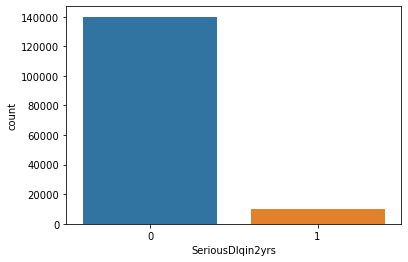

In [630]:
sns.countplot(x=df["SeriousDlqin2yrs"])

In [631]:
value_0 = df["SeriousDlqin2yrs"].value_counts()[0]
value_1 = df["SeriousDlqin2yrs"].value_counts()[1]
print("Total number of value_0: {}".format(value_0))
print("Total number of value_1: {}".format(value_1))
print("%value_1 in the data: {}%".format(value_1/(value_0 + value_1) *100))

Total number of value_0: 139974
Total number of value_1: 10026
%value_1 in the data: 6.683999999999999%


> The data is highly imbalanced. Class True has only 6.68% rows in the data.

## Correlations between variables
This is to check the correlation between different variables present.
If there is a strong correlation between two features, those two together in the dataset won't contribute as much. Just one of those will be enough.

If there is a strong correlation between a feature and the target variable, then we should keep that feature.

_Note: The strong correlation can be either positive or negative._

_Note: The Seaborn PairPlot is taking too much time. So I am taking the below steps._

<AxesSubplot:>

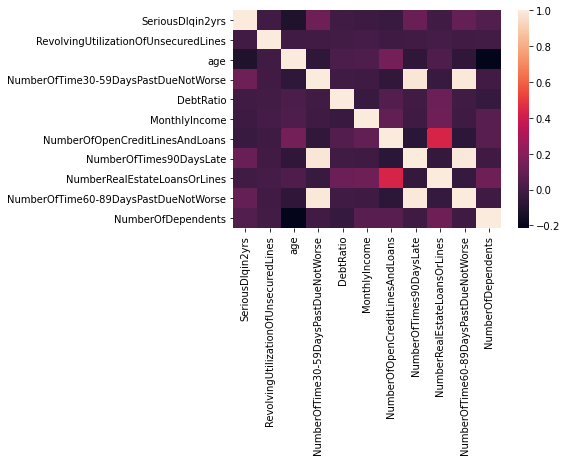

In [633]:
sns.heatmap(df.corr())

### Observations
1. There are no strong correlations of any features with the target varible **SeriousDlqin2yrs**.
2. The **NumberOfTime30-59DaysPastDueNotWorse**, **NumberOfTime60-89DaysPastDueNotWorse** and **NumberOfTimes90DaysLate** are highly correrelated.
3. There is some considerable amount of correlation between **NumberOfOpenCreditLinesAndLoans** and **NumberRealEstateLoansOrLines**.

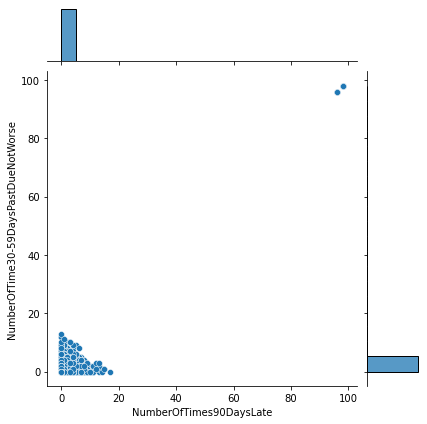

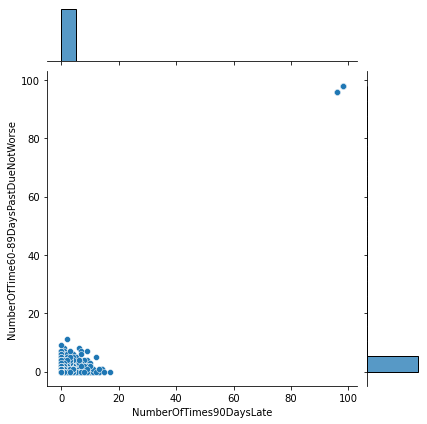

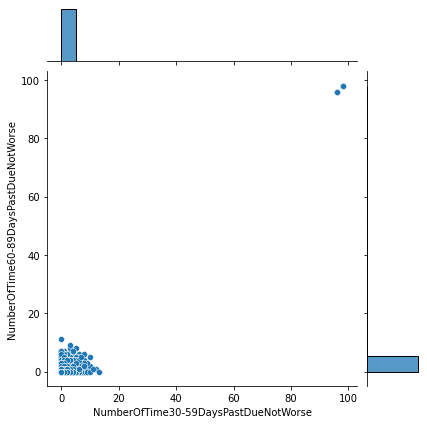

In [634]:
sns.jointplot(x="NumberOfTimes90DaysLate", y="NumberOfTime30-59DaysPastDueNotWorse", data=df)
sns.jointplot(x="NumberOfTimes90DaysLate", y="NumberOfTime60-89DaysPastDueNotWorse", data=df)
sns.jointplot(x="NumberOfTime30-59DaysPastDueNotWorse", y="NumberOfTime60-89DaysPastDueNotWorse", data=df)

### Observation:
Because of the two outliers, our distribution is cornered into another corner and it is hard to see the correlation between the points. Once, we fix those two outliers in the three rows, we might be able to see the correlations better.

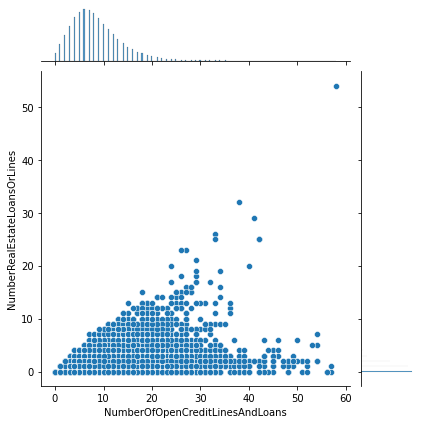

In [635]:
#  NumberOfOpenCreditLinesAndLoans and NumberRealEstateLoansOrLines
sns.jointplot(x="NumberOfOpenCreditLinesAndLoans", y="NumberRealEstateLoansOrLines", data=df)

### Observation
There is hardly any strong correlation between the variables, but the one point on the far top-right corner, could be a possible outlier. But this outlier confirmation needs more context and domain knowledge.

## Outlier Detection
This process to find outliers in all the columns

### Visualizations

[]

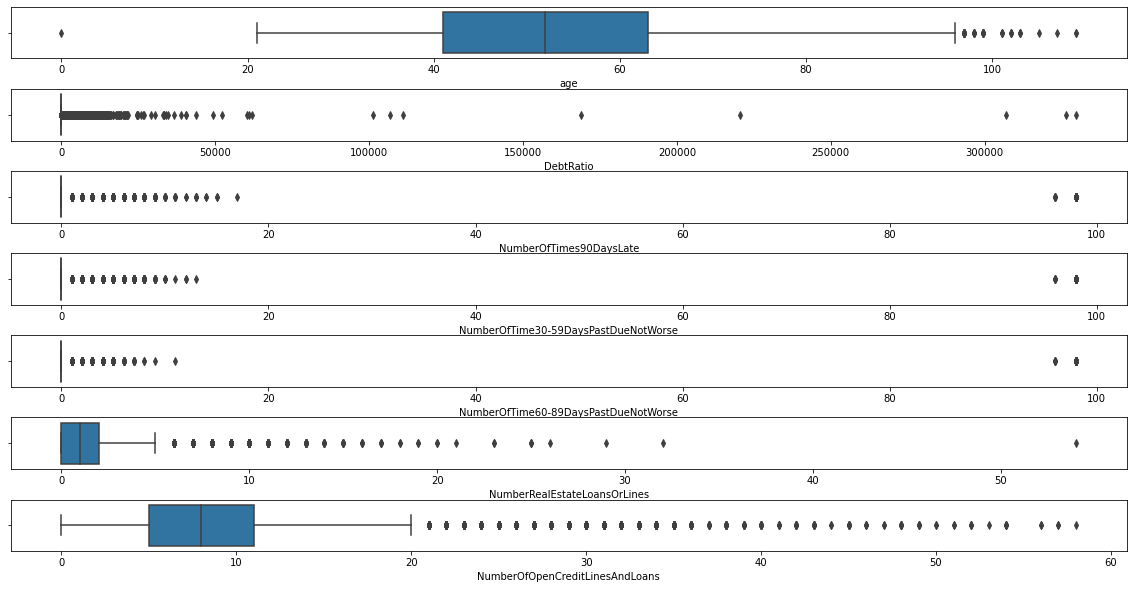

In [628]:
fig, axis = plt.subplots(7,1)
sns.boxplot(x="age", ax=axis[0], data=df)
sns.boxplot(x="DebtRatio", ax=axis[1], data=df)
sns.boxplot(x="NumberOfTimes90DaysLate", ax=axis[2], data=df)
sns.boxplot(x="NumberOfTime30-59DaysPastDueNotWorse", ax=axis[3], data=df)
sns.boxplot(x="NumberOfTime60-89DaysPastDueNotWorse", ax=axis[4], data=df)
sns.boxplot(x="NumberRealEstateLoansOrLines", ax=axis[5], data=df)
sns.boxplot(x="NumberOfOpenCreditLinesAndLoans", ax=axis[6], data=df)
fig.set_size_inches(20,10)
plt.subplots_adjust(hspace=0.6)
plt.plot()

In [9]:
for col in ["NumberRealEstateLoansOrLines", "NumberOfOpenCreditLinesAndLoans", "DebtRatio"]:
    print(f"99% Percentile value for {col} is {df[col].quantile(0.99)}")

99% Percentile value for NumberRealEstateLoansOrLines is 4.0
99% Percentile value for NumberOfOpenCreditLinesAndLoans is 24.0
99% Percentile value for DebtRatio is 4979.040000000037


> We can confirm from the above graph and calculations that the following are outliers
> 1. **age = 0**
> 2. **NumberOfTime30-59DaysPastDueNotWorse = [96, 98]**
> 3. **NumberOfTime60-89DaysPastDueNotWorse = [96, 98]**
> 4. **NumberRealEstateLoansOrLines > 4**
> 5. **NumberOfOpenCreditLinesAndLoans > 24**

_Note: I have my suspicion about the **NumberOfTimes90DaysLate** too, but since, the description doesn't give a timeline for the data collection, I cannot ascertain the validity on the same ground as for **NumberOfTime30-59DaysPastDueNotWorse** and **NumberOfTime60-89DaysPastDueNotWorse**._

## Imputing Data
1. Missing data
   1. **MonthlyIncome**
   2. **NumberOfDependents**
2. Outliers
   1. **age**
   2. **NumberOfTimes90DaysLate**
   3. **NumberOfTime60-89DaysPastDueNotWorse**
   4. **NumberOfTime30-59DaysPastDueNotWorse**
   5. **NumberOfOpenCreditLinesAndLoans**
   6. **NumberRealEstateLoansOrLines**

1.A For **MonthlyIncome**, we can using **median** of the column.
> Median household income is a more robust and accurate measure for summarizing income at the geographic level as compared to average household income since it is not affected by a small number of extremely high or low income outlier households.
Ref: http://www.mbcdp.ca/blog/median-vs-average-household-income-what-is-the-difference-between-these-indicators-and-how-to-interpret-them

In [636]:
monthly_income_counts_df = df[df['MonthlyIncome']>0]["MonthlyIncome"].value_counts().sort_index(ascending=True)
median_montly_income = df['MonthlyIncome'].median()
print(f"Minimum Income(not 0 or null) ${monthly_income_counts_df.index.min()}")
print(f"Maximum Income ${monthly_income_counts_df.index.max()}")
print(f"Median Income ${median_montly_income}")

Minimum Income(not 0 or null) $1.0
Maximum Income $3008750.0
Median Income $5400.0


> Note: The working age population in USA is 15-64. https://www.census.gov/library/stories/2020/06/working-age-population-not-keeping-pace-with-growth-in-older-americans.html

1. Fix the 1 outlier age=0
2. Divide the data into two parts, **15-64** and **64 and above**
3. Assign the respective median incomes.


In [637]:
# 1. Fixing the age=0 outlier with average age in the dataset. Since mean and median are almost similar
df.loc[df['age'] < 18, "age"] = df['age'].median()

# 2. Divide the data into two parts. We should be dividing it into three parts, less than 15, 15-64 and 
# greater than 64. But after the above imputation, the new minimum for age is 21. So only two groups.
df_working_population = df.loc[df["age"] <= 64]
df_senior_population = df.loc[df["age"] > 64]

# 3. Finding their individual medians
df_working_pop_income_median = df_working_population["MonthlyIncome"].median()
df_senior_pop_income_median = df_senior_population["MonthlyIncome"].median()

# 4. Impute the values into the original data
df.loc[(df["MonthlyIncome"].isna()) & (df["age"] <= 64), "MonthlyIncome"] = df_working_pop_income_median
df.loc[(df["MonthlyIncome"].isna()) & (df["age"] > 64), "MonthlyIncome"] = df_senior_pop_income_median

1.B For **NumberOfDependents**, let us first see the distribution

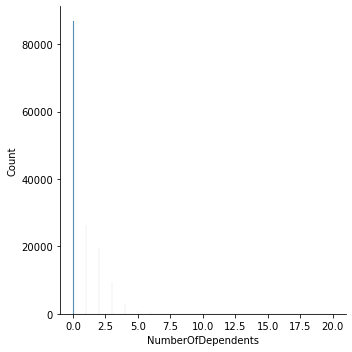

In [638]:
sns.displot(df["NumberOfDependents"])

In [639]:
print(df['NumberOfDependents'].value_counts().sort_index())

pop_with_zero_dependents = \
(df.loc[df['NumberOfDependents']==0, 'NumberOfDependents'].count()/df['NumberOfDependents'].count())*100

print(f"%Population with NumberOfDependents = 0: {pop_with_zero_dependents}%")

0.0     86902
1.0     26316
2.0     19522
3.0      9483
4.0      2862
5.0       746
6.0       158
7.0        51
8.0        24
9.0         5
10.0        5
13.0        1
20.0        1
Name: NumberOfDependents, dtype: int64
%Population with NumberOfDependents = 0: 59.490949916481824%


> As we can almost 60% of the population has no number of dependents, we can just assign the null values 0 there.


In [640]:
# 1. Imputing NumberOfDependents
df.loc[df['NumberOfDependents'].isnull(), "NumberOfDependents"] = df['NumberOfDependents'].mode().loc[0]

In [641]:
print(df['NumberOfDependents'].value_counts().sort_index())

pop_with_zero_dependents = \
(df.loc[df['NumberOfDependents']==0, 'NumberOfDependents'].count()/df['NumberOfDependents'].count())*100

print(f"%Population with NumberOfDependents = 0: {pop_with_zero_dependents}%")

0.0     90826
1.0     26316
2.0     19522
3.0      9483
4.0      2862
5.0       746
6.0       158
7.0        51
8.0        24
9.0         5
10.0        5
13.0        1
20.0        1
Name: NumberOfDependents, dtype: int64
%Population with NumberOfDependents = 0: 60.550666666666665%


2. For all the two outliers **NumberOfTime60-89DaysPastDueNotWorse**, and **NumberOfTime30-59DaysPastDueNotWorse**, we will first see the distribution and data values.

In [642]:
print(df['NumberOfTime60-89DaysPastDueNotWorse'].value_counts().sort_index())

0     142396
1       5731
2       1118
3        318
4        105
5         34
6         16
7          9
8          2
9          1
11         1
96         5
98       264
Name: NumberOfTime60-89DaysPastDueNotWorse, dtype: int64


In [643]:
col = "NumberOfTime60-89DaysPastDueNotWorse"
df[col].value_counts()

perc_outliers = df.loc[df[col].isin([96, 98]), col].count()*100/df[col].count()
print(f"% Outlier values [96 and 98]: {perc_outliers}")

% Outlier values [96 and 98]: 0.17933333333333334


> This is less than 0.2% values. And all the other values are less than 11. Again, we can go either with Median or Mode, both are 0 in this case.

In [644]:
print(df['NumberOfTime30-59DaysPastDueNotWorse'].value_counts().sort_index())

0     126018
1      16033
2       4598
3       1754
4        747
5        342
6        140
7         54
8         25
9         12
10         4
11         1
12         2
13         1
96         5
98       264
Name: NumberOfTime30-59DaysPastDueNotWorse, dtype: int64


In [645]:
col = "NumberOfTime30-59DaysPastDueNotWorse"
df[col].value_counts()

perc_outliers = df.loc[df[col].isin([96, 98]), col].count()*100/df[col].count()
print(f"% Outlier values [96 and 98]: {perc_outliers}")

% Outlier values [96 and 98]: 0.17933333333333334


> This is less than 0.2% values. And all the other values are less than 13. Again, we can go either with Median or Mode, both are 0 in this case.

In [646]:
for col in ["NumberOfTime30-59DaysPastDueNotWorse", "NumberOfTime60-89DaysPastDueNotWorse"]:
    df.loc[df[col].isin([96, 98]), col] = df[col].median()

#### Now let us check the distribution again for these two columns.

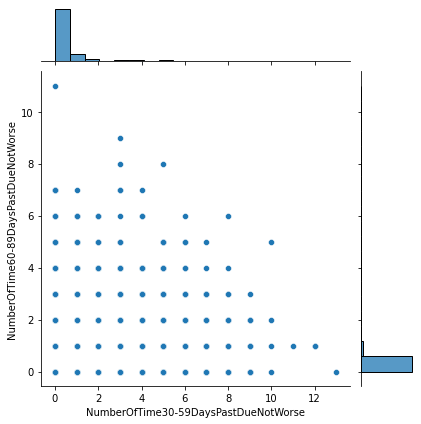

In [647]:
sns.jointplot(x="NumberOfTime30-59DaysPastDueNotWorse", y="NumberOfTime60-89DaysPastDueNotWorse", data=df)

3. **For the column NumberOfTimes90DaysLate**
    1. Let us find out age of the borrowers
    2. Calculate the number of days required for being at least 90 days late for 96 and 98 times.

In [648]:
# 1. Let us find out age of the borrowers
ages = df.loc[df["NumberOfTimes90DaysLate"] == 96]["age"]
ages = df.loc[df["NumberOfTimes90DaysLate"] == 98]["age"]

# 2. Calculate the number of days required for being at least 90 days late for 96 and 98 times.
min_age_for_96 = (96*90)/365
print(f"Least number of years required to be at least 90 days late for 96 times: {min_age_for_96}")

min_age_for_98 = (98*90)/365
print(f"Least number of years required to be at least 90 days late for 96 times: {min_age_for_98}")


Least number of years required to be at least 90 days late for 96 times: 23.671232876712327
Least number of years required to be at least 90 days late for 96 times: 24.164383561643834


In [649]:
qualifying_loan_age = 18

defaulters_above_42 = df.loc[(df["age"] >= 42) & (df["NumberOfTimes90DaysLate"].isin([96, 98]))]["age"].count()
defaulters_above_96_times = df.loc[df["NumberOfTimes90DaysLate"].isin([96, 98])]["age"].count()

print(f"% People who can default at least 96 times above 90 times: "
      f"{defaulters_above_42*100/defaulters_above_96_times}")

% People who can default at least 96 times above 90 times: 28.62453531598513


### Observation
The minimum age of getting a loan in USA is 18 Year old(https://www.forbes.com/advisor/personal-loans/personal-loan-requirements/). And to default at least 90 days for 96 times, the person requires to spent at least 23.67 years in crushing debt. Given, that, the person is paying some amount every 90 days. Now, if we add all this, 
    ```
    The minimum age for defaulting 96 times: 18+23.67 = 41.67 Years
    The minimum age for defaulting 98 times: 18+24.16 ~ 42.16 Years
    ```
So, the value is roughly 42 years.

Now, if we take that into account, we can see, only 28.62% values are following the criteria. Which also means, the data can actually be recorded wrong. Hence, we need to impute it too.

In [650]:
# 1. Impute NumberOfTimes90DaysLate same as 
# "NumberOfTime30-59DaysPastDueNotWorse" and "NumberOfTime60-89DaysPastDueNotWorse", using median
col = "NumberOfTimes90DaysLate"
df.loc[df[col].isin([96, 98]), col] = df[col].median()

In [652]:
df[["NumberOfTime30-59DaysPastDueNotWorse", 
   "NumberOfTime60-89DaysPastDueNotWorse", "NumberOfTimes90DaysLate"]].corr()

,NumberOfTime30-59DaysPastDueNotWorse,NumberOfTime60-89DaysPastDueNotWorse,NumberOfTimes90DaysLate
NumberOfTime30-59DaysPastDueNotWorse,1.000000,0.305956,0.218233
NumberOfTime60-89DaysPastDueNotWorse,0.305956,1.000000,0.294684
NumberOfTimes90DaysLate,0.218233,0.294684,1.000000


### Observation
After fixing the data, the correlation between **NumberOfTime30-59DaysPastDueNotWorse**, **NumberOfTime60-89DaysPastDueNotWorse** and **NumberOfTimes90DaysLate** has decreased significantly.

4. For the columns **NumberOfOpenCreditLinesAndLoans** and **NumberRealEstateLoansOrLines**
   1. Fix the 99% quartile value

_I do not have enough knowledge or information on how to deal with this. My gut feeling is to assign the Percentile 99 value._

In [655]:
for col in ["NumberRealEstateLoansOrLines", "NumberOfOpenCreditLinesAndLoans"]:
    perc_99 = df[col].quantile(0.99)
    df.loc[df[col] > perc_99, col] = perc_99

[]

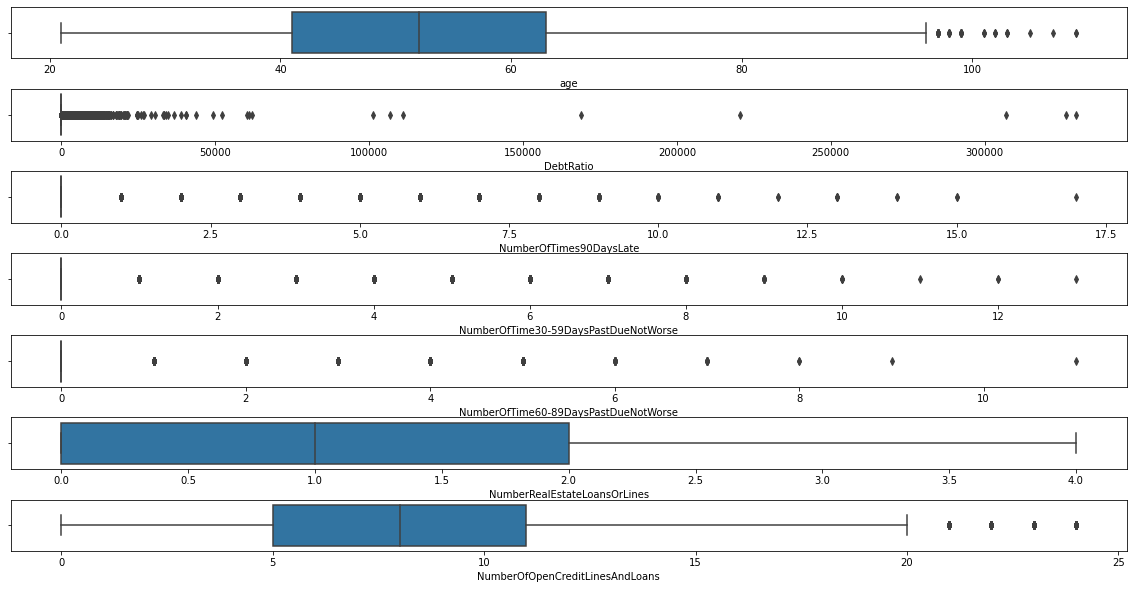

In [656]:
fig, axis = plt.subplots(7,1)
sns.boxplot(x="age", ax=axis[0], data=df)
sns.boxplot(x="DebtRatio", ax=axis[1], data=df)
sns.boxplot(x="NumberOfTimes90DaysLate", ax=axis[2], data=df)
sns.boxplot(x="NumberOfTime30-59DaysPastDueNotWorse", ax=axis[3], data=df)
sns.boxplot(x="NumberOfTime60-89DaysPastDueNotWorse", ax=axis[4], data=df)
sns.boxplot(x="NumberRealEstateLoansOrLines", ax=axis[5], data=df)
sns.boxplot(x="NumberOfOpenCreditLinesAndLoans", ax=axis[6], data=df)
fig.set_size_inches(20,10)
plt.subplots_adjust(hspace=0.6)
plt.plot()

## Feature Engineering

In [557]:
# def bucketing_credit_utilisation(x):
# #     if x <= 100:
# #         return "Within Limits"
# #     else:
# #         return "Out of Limits"
#     max_p = 4
#     category = "Less than {}"
#     for p in range(1, max_p):
#         if x < 10**p:
#             return category.format(10**p)
#     else: return f"More than {10**(max_p-1)}"
    
# df["categorized_credit_utilization"] = df["RevolvingUtilizationOfUnsecuredLines"].apply(
#     lambda x: bucketing_credit_utilisation(x))

In [558]:
# sns.countplot(data=df, hue="categorized_credit_utilization", x="SeriousDlqin2yrs")

In [559]:
# col = "categorized_credit_utilization"
# for value in df[col].unique():
#     total_in_value = df[col].loc[df[col] == value].count()
#     total_deliquent_in_value = df[col].loc[(df[col] == value) & (df["SeriousDlqin2yrs"] == 1)].count()
#     print(f"% of Delinquents in category: {value} is {total_deliquent_in_value*100/total_in_value}%")

1. We can add all the PastDue columns(**NumberOfTime30-59DaysPastDueNotWorse**, **NumberOfTime60-89DaysPastDueNotWorse** and **NumberOfTimes90DaysLate**) and create a new one.
2. We can add both the **NumberOfOpenCreditLinesAndLoans** and **NumberRealEstateLoansOrLines** and a create a new one.

In [560]:
# 1
df["TotalPastDue"] = df["NumberOfTime30-59DaysPastDueNotWorse"] + df["NumberOfTime60-89DaysPastDueNotWorse"]
+ df["NumberOfTimes90DaysLate"]

# 2
df["TotalOpenCreditLines"] = df["NumberOfOpenCreditLinesAndLoans"] + df["NumberRealEstateLoansOrLines"]

In [561]:
df[["SeriousDlqin2yrs", "TotalOpenCreditLines", "TotalPastDue"]].describe()

,SeriousDlqin2yrs,TotalOpenCreditLines,TotalPastDue
count,150000.000000,150000.000000,150000.000000
mean,0.066840,9.471000,0.310060
std,0.249746,5.727394,0.857668
min,0.000000,0.000000,0.000000
25%,0.000000,5.000000,0.000000
50%,0.000000,9.000000,0.000000
75%,0.000000,13.000000,0.000000
max,1.000000,112.000000,15.000000


In [562]:
df[["SeriousDlqin2yrs", "TotalOpenCreditLines", "TotalPastDue"]].corr()

,SeriousDlqin2yrs,TotalOpenCreditLines,TotalPastDue
SeriousDlqin2yrs,1.000000,-0.028045,0.322766
TotalOpenCreditLines,-0.028045,1.000000,0.057141
TotalPastDue,0.322766,0.057141,1.000000


In [563]:
# Fixing data type of the NumberOfDependents
df["NumberOfDependents"].astype("Int64")

df.dtypes

SeriousDlqin2yrs                          int64
RevolvingUtilizationOfUnsecuredLines    float64
age                                       int64
NumberOfTime30-59DaysPastDueNotWorse      int64
DebtRatio                               float64
MonthlyIncome                           float64
NumberOfOpenCreditLinesAndLoans           int64
NumberOfTimes90DaysLate                   int64
NumberRealEstateLoansOrLines              int64
NumberOfTime60-89DaysPastDueNotWorse      int64
NumberOfDependents                      float64
TotalPastDue                              int64
TotalOpenCreditLines                      int64
dtype: object

## Final Words:
1. The data is highly imbalanced.
2. All the datatypes are matching the intended/required schema.
3. The **age=0** outlier was fixed by the median of the column.
4. The **MonthlyIncome** null values are imputed with median of the column, segregated by _Working Population (age<=64)_ and _Non Working Population(age>=64)_.
5. **NumberOfDependents** null values are imputed with mode of the column.
6. The outliers values for **NumberOfTime30-59DaysPastDueNotWorse**, **NumberOfTime60-89DaysPastDueNotWorse** and **NumberOfTimes90DaysLate** were _96_ and _98_, which were replaced by the median of the respective columns.
7. For the columns **NumberOfOpenCreditLinesAndLoans** and **NumberRealEstateLoansOrLines**, any outlier beyond 99% quartile
8. Two new features are generated,
   1. Sum of all the PastDues
   2. Sum of all the Credit Lines and Loans
   